## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Oscar Maffei

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

#   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


In [1]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
import instruments as inst
import siggen as sig
import pds2018 as pds


N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
#%% Funciones
def Espectro(w, title_s="",title_fft="",bottom=-50,top=10,span=0.5,):

    plt.plot(w)
    plt.title(title_s)
    plt.ylabel("Amplitud")
    plt.xlabel("n")
    plt.grid()
    plt.show()
    plt.figure()
    
    
    A = np.fft.fft(w,2048) / (len(w)/2.0)
    mag=np.fft.fftshift(A / abs(A).max())
    minim=int(len(A)/2 - len(A)*span)
    maxim=int(len(A)/2 + len(A)*span)
    resp = 20 * np.log10(np.abs(mag[minim:maxim])+0.000001)
    resp = np.clip(resp, bottom, top)
    freq = np.linspace(-span, span, len(resp))
    
    
    plt.plot(freq, resp)
    plt.title(title_fft)
    plt.ylabel("Magnitud [dB]")
    plt.xlabel("F. Normalizada [ciclos por muestra]")
    plt.grid()
    plt.axis('tight')
    
    plt.show()
    

def Espectro05(w, title_s="",title_fft="",bottom=-50,top=10,start=0,stop=0.5,noplot=False,Norm=True,dB=True):
    
    if (noplot==False):
        plt.plot(w)
        plt.title(title_s)
        plt.ylabel("Amplitud")
        plt.xlabel("n")
        plt.grid()
        plt.show()
        plt.figure()
        
    
    
    if (Norm==True):
        A = np.fft.fft(w,8192) / (len(w)/2.0)
        mag=np.fft.fftshift(A / abs(A).max())
    else:
        A = np.fft.fft(w,8192) / (len(w)/2)
        mag=np.fft.fftshift(A)    
        
    minim=len(mag)/2 + len(mag) * start
    maxim=len(mag)/2 + len(mag) * stop 
    
    if (dB==True):
        resp = 20 * np.log10(np.abs(mag[int(minim):int(maxim)])+0.000001)
    else:
        resp=np.abs(mag[int(minim):int(maxim)])
    
    resp = np.clip(resp, bottom, top)
    freq = np.linspace(start, stop, len(resp))
    
    if (noplot==False):
        plt.plot(freq, resp)
        plt.title(title_fft)
        if (dB==True):    
            plt.ylabel("Magnitud [dB]")
        else:    
            plt.ylabel("Magnitud")

        plt.xlabel("F. Normalizada [ciclos por muestra]")
        plt.grid()
        plt.axis('tight')
        plt.show()
       
    return freq,resp

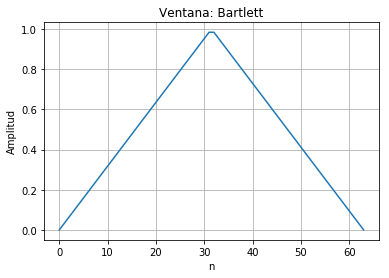

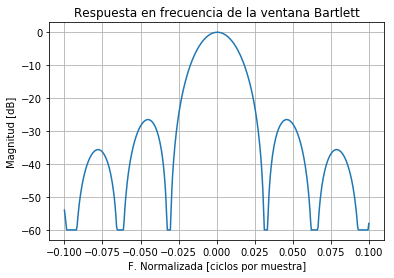

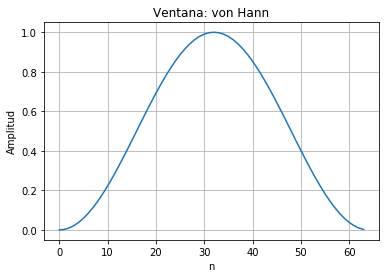

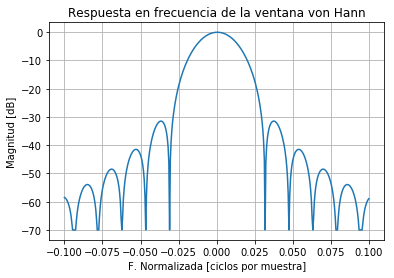

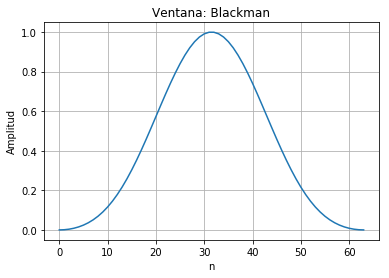

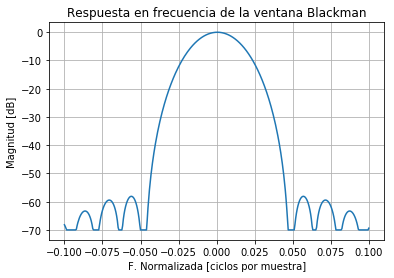

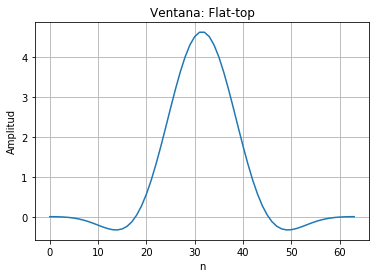

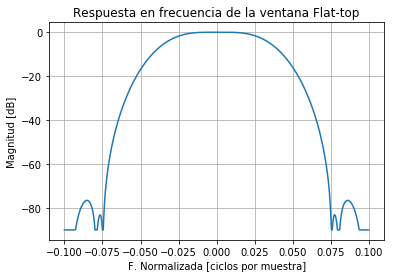

In [2]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
n,w=pds.V_Bartlett(64)
Espectro(w,"Ventana: Bartlett","Respuesta en frecuencia de la ventana Bartlett",-60,10,0.1)

n,w=pds.V_Hann(64)
Espectro(w,"Ventana: von Hann","Respuesta en frecuencia de la ventana von Hann",-70,10,0.1)

n,w=pds.V_Blackman(64) 
Espectro(w,"Ventana: Blackman","Respuesta en frecuencia de la ventana Blackman",-70,10,0.1)

n,w=pds.V_Flattop(64)
Espectro(w,"Ventana: Flat-top","Respuesta en frecuencia de la ventana Flat-top",-90,10,0.1)


b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [3]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['0.032', '-13.26'], # <-- acá debería haber numeritos :)
                   ['0.06', '-26.27'], # <-- acá debería haber numeritos :)
                   ['0.062', '-31.47'], # <-- acá debería haber numeritos :)
                   ['0.088', '-57.99'], # <-- acá debería haber numeritos :)
                   ['0.146', '-76.60'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,0.032,-13.26
Bartlett,0.06,-26.27
Hann,0.062,-31.47
Blackman,0.088,-57.99
Flat-top,0.146,-76.60


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

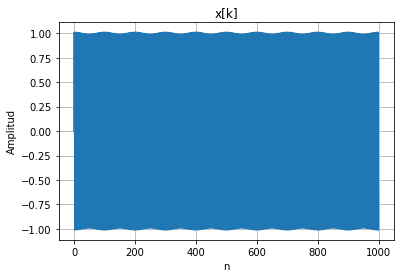

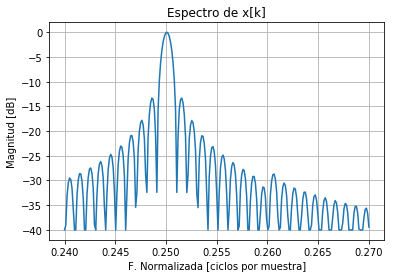

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
k=np.linspace(0,N-1,N).flatten()

W1=np.pi/2
W2=W1 + 10*(2*np.pi/N)
x1=np.sin(W1*k)
x1.flatten()
x2=0.01*np.sin(W2*k)
x2.flatten()
x=x1+x2

f,r=Espectro05(x,"x[k]","Espectro de x[k]",-40,10,0.24,0.27)



<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> -40 dB es el valor para el cual se empieza a evidenciar.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende de la amplitud de x2 pero tambien de la amplitud de x1.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al cuantificar en 16 bits el ruido no es significativo como para afectar el resultado. Si se cuantifica en 4 bits por ejemplo se puede ver como el ruido de cuantización es notoriamente mas alto.
</div>

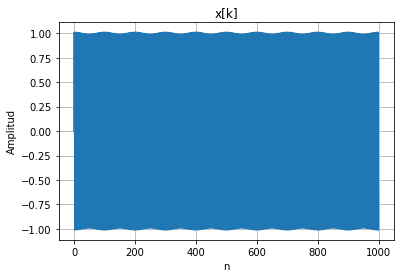

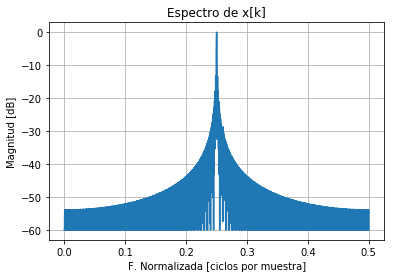

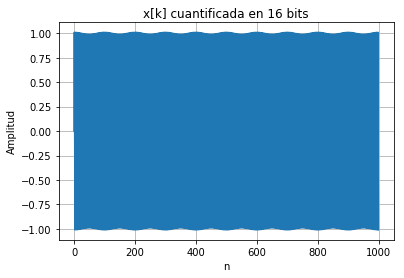

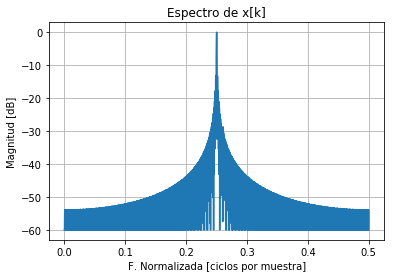

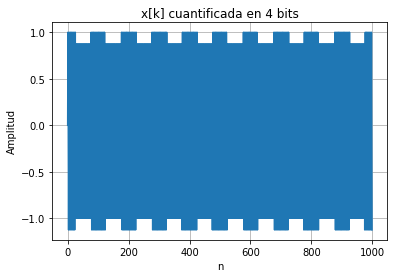

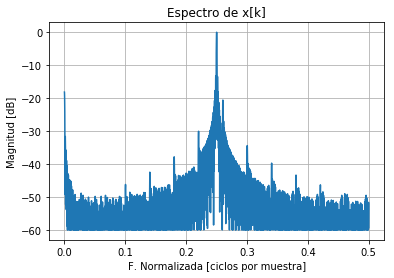

In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
k=np.linspace(0,N-1,N).flatten()
W1=np.pi/2
W2=W1 + (10*2*np.pi)/N
x1=1*np.sin(W1*k)
x2=0.01*np.sin(W2*k)
x=x1+x2

f,r=Espectro05(x,"x[k]","Espectro de x[k]",-60,10,0,0.5)

xq=inst.CuantificarB(x,16)

Espectro05(xq,"x[k] cuantificada en 16 bits","Espectro de x[k]",-60,10,0,0.5)

xq=inst.CuantificarB(x,4)

f,r=Espectro05(xq,"x[k] cuantificada en 4 bits","Espectro de x[k]",-60,10,0,0.5)


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

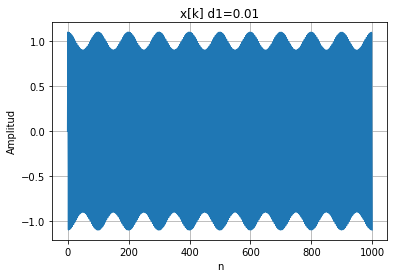

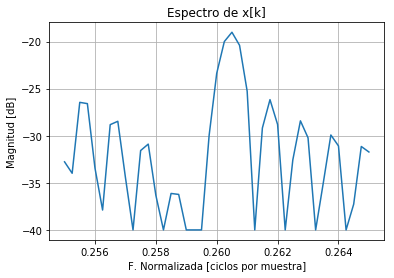

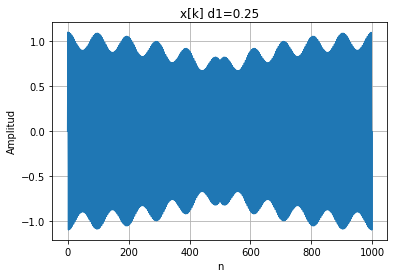

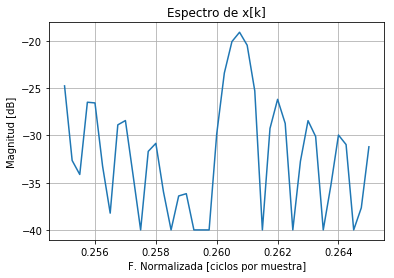

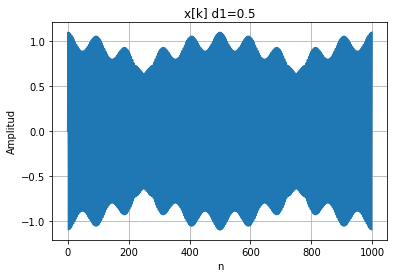

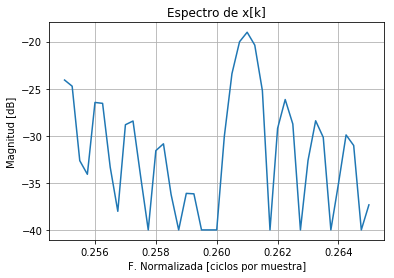

,$a_2$ (dB)
leve,-19.013822
moderada,-20.052445
máxima,-23.410335


In [36]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
k=np.linspace(0,N-1,N).flatten()
d=0.01
W1=np.pi/2 + (d*2*np.pi)/N
W2=W1 + (10*2*np.pi)/N
x1=1*np.sin(W1*k)
x2=0.1*np.sin(W2*k)
x=x1+x2
freq,resp=Espectro05(x,"x[k] d1=0.01","Espectro de x[k]",-40,10,0.255,0.265)

a1= max(resp) 
i= resp.argmax()

d=0.25
W1=np.pi/2 + (d*2*np.pi)/N
W2=W1 + (10*2*np.pi)/N
x1=1*np.sin(W1*k)
x2=0.1*np.sin(W2*k)
x=x1+x2
freq,resp=Espectro05(x,"x[k] d1=0.25","Espectro de x[k]",-40,10,0.255,0.265)
a2=resp[i]

d=0.5
W1=np.pi/2 + (d*2*np.pi)/N
W2=W1 + (10*2*np.pi)/N
x1=1*np.sin(W1*k)
x2=0.1*np.sin(W2*k)
x=x1+x2
freq,resp=Espectro05(x,"x[k] d1=0.5","Espectro de x[k]",-40,10,0.255,0.265)
a3=resp[i]




#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   a1, # <-- acá debería haber numeritos :)
                   a2, # <-- acá debería haber numeritos :)
                   a3 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

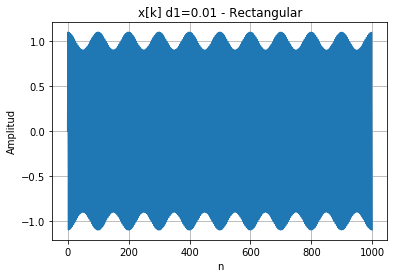

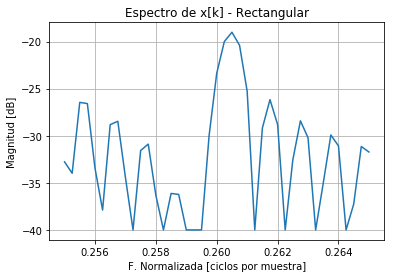

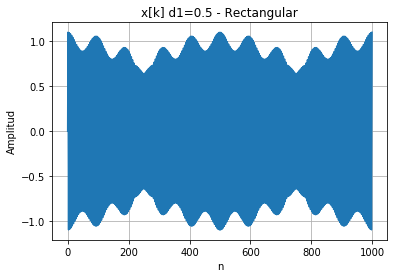

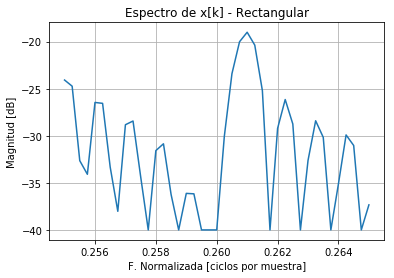

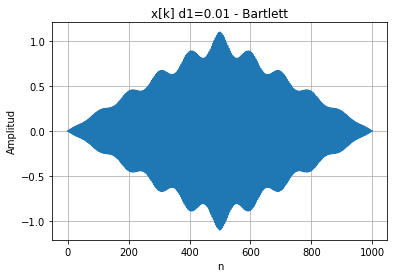

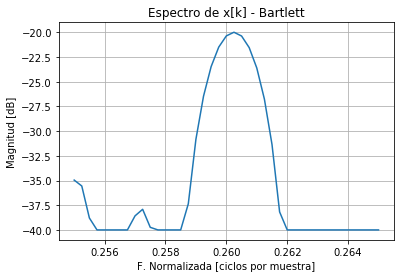

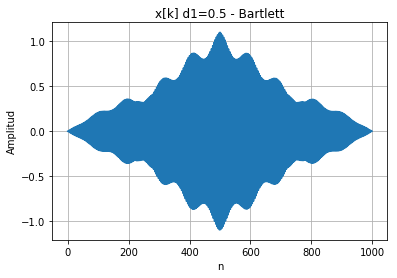

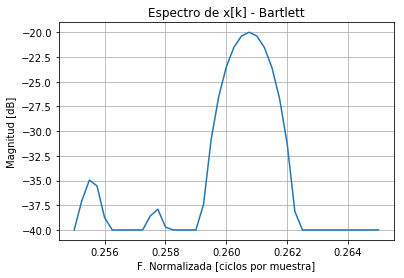

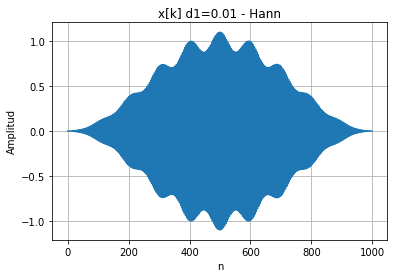

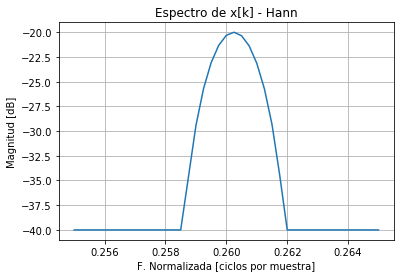

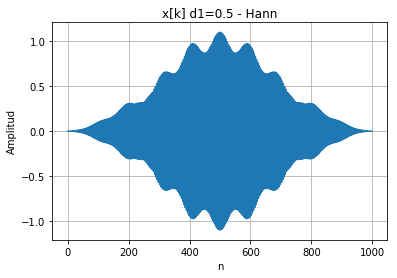

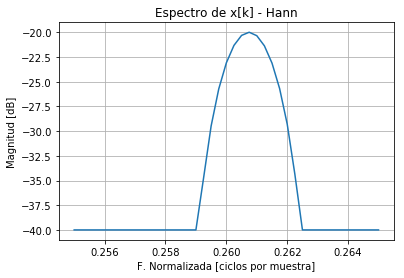

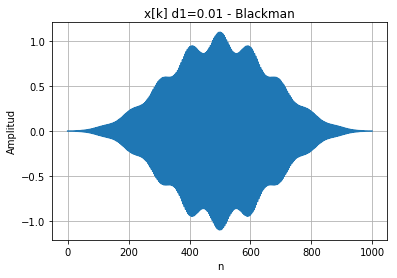

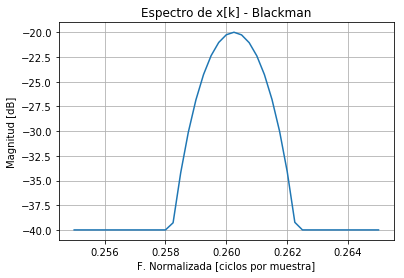

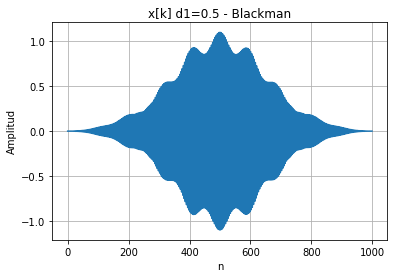

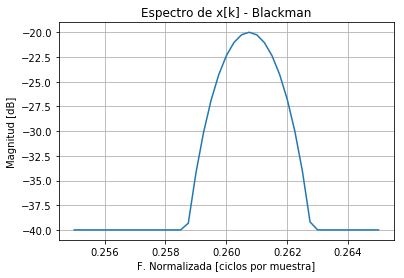

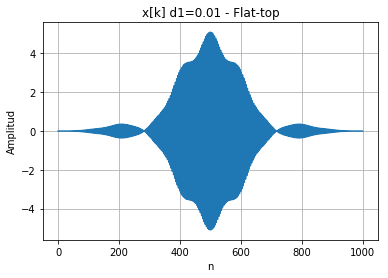

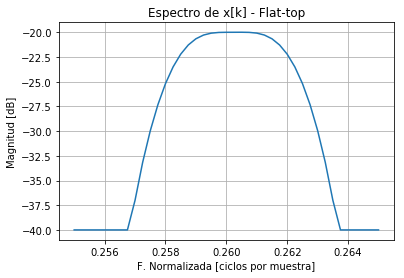

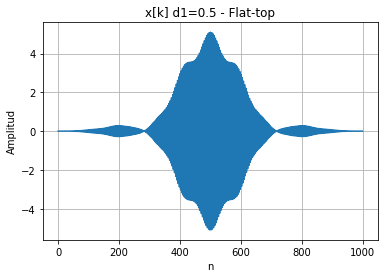

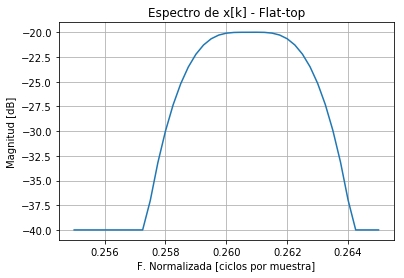

In [44]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

def ShowWin(x1,x2,Vent):
    freq,resp=Espectro05(x1,"x[k] d1=0.01" + Vent,"Espectro de x[k]" + Vent,-40,10,0.255,0.265)
    a0= max(resp) 
    i= resp.argmax()
    freq,resp=Espectro05(x2,"x[k] d1=0.5" + Vent,"Espectro de x[k]" + Vent,-40,10,0.255,0.265)
    a1=resp[i]
    return a0,a1


k=np.linspace(0,N-1,N).flatten()
d=0.01
W1=np.pi/2 + (d*2*np.pi)/N
W2=W1 + (10*2*np.pi)/N
x1=1*np.sin(W1*k)
x2=0.1*np.sin(W2*k)
x001=x1+x2

d=0.5
W1=np.pi/2 + (d*2*np.pi)/N
W2=W1 + (10*2*np.pi)/N
x1=1*np.sin(W1*k)
x2=0.1*np.sin(W2*k)
x05=x1+x2

a20,a21= ShowWin(x001,x05," - Rectangular")

n,w=pds.V_Bartlett(len(x001))
x001w=x001*w
x05w=x05*w
a20b,a21b= ShowWin(x001w,x05w," - Bartlett")

n,w=pds.V_Hann(len(x001))
x001w=x001*w
x05w=x05*w
a20h,a21h= ShowWin(x001w,x05w," - Hann")

n,w=pds.V_Blackman(len(x001))
x001w=x001*w
x05w=x05*w
a20bm,a21bm= ShowWin(x001w,x05w," - Blackman")

n,w=pds.V_Flattop(len(x001))
x001w=x001*w
x05w=x05*w
a20ft,a21ft= ShowWin(x001w,x05w," - Flat-top")


    


In [45]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [a20, a21], # <-- acá debería haber numeritos :)
                   [a20b, a21b], # <-- acá debería haber numeritos :)
                   [a20h, a21h], # <-- acá debería haber numeritos :)
                   [a20bm, a21bm], # <-- acá debería haber numeritos :)
                   [a20ft, a21ft] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-19.013822,-23.410335
Bartlett,-19.999195,-21.512523
Hann,-19.999324,-21.328833
Blackman,-19.999114,-21.038442
Flat-top,-19.997786,-20.002491


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

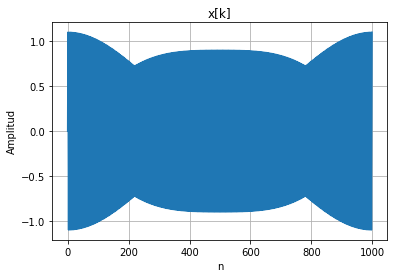

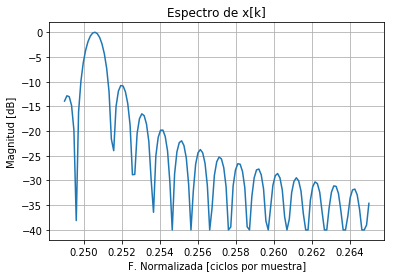

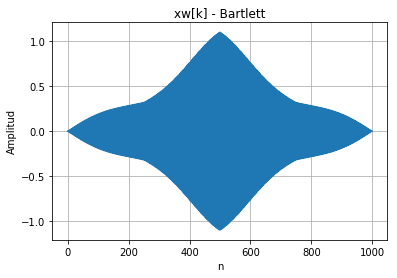

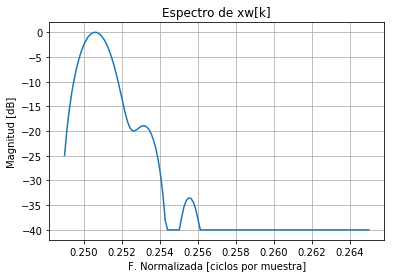

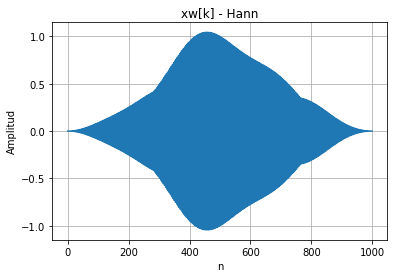

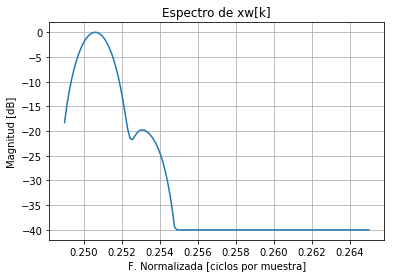

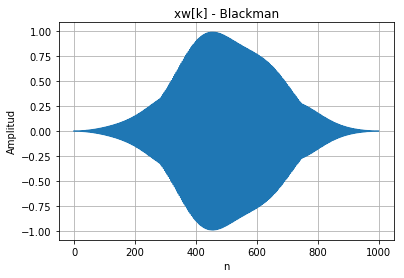

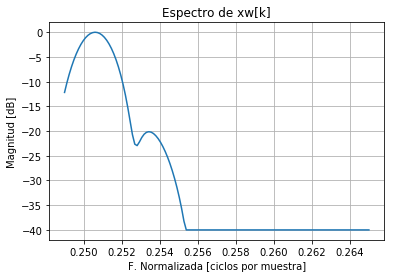

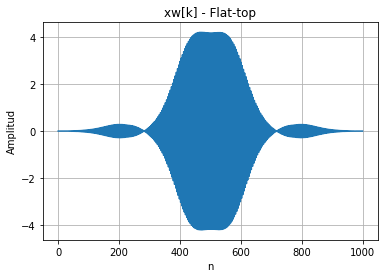

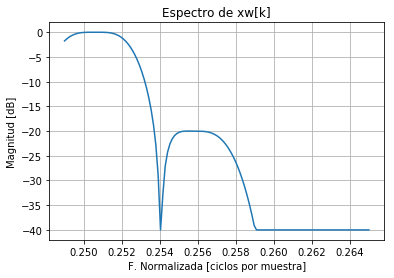

,$\Omega_0$ (#)
Rectangular,0.006283
Bartlett,0.012566
Hann,0.015708
Blackman,0.016965
Flat-top,0.031416


In [8]:

#######################################
# Tu simulación que genere resultados #
#######################################
k=np.linspace(0,N-1,N).flatten()

W1=np.pi/2 + (np.pi)/N
x1=1*np.sin(W1*k)

F=1
W2=W1 + (F*2*np.pi)/N
x2=0.1*np.sin(W2*k)
x=x1+x2
W0 = W2-W1
freq,resp=Espectro05(x,"x[k]","Espectro de x[k]",-40,10,0.249,0.265)

F=2
W2=W1 + (F*2*np.pi)/N
x2=0.1*np.sin(W2*k)
x=x1+x2
W0b = W2-W1
n,w=pds.V_Bartlett(N)
xw=x*w
freq,resp=Espectro05(xw,"xw[k] - Bartlett","Espectro de xw[k]",-40,10,0.249,0.265)

F=2.5
W2=W1 + (F*2*np.pi)/N
x2=0.1*np.sin(W2*k)
x=x1+x2
W0h = W2-W1
n,w=pds.V_Hann(N)
xw=x*w
freq,resp=Espectro05(xw,"xw[k] - Hann","Espectro de xw[k]",-40,10,0.249,0.265)

F=2.7
W2=W1 + (F*2*np.pi)/N
x2=0.1*np.sin(W2*k)
x=x1+x2
W0bm = W2-W1
n,w=pds.V_Blackman(N)
xw=x*w
freq,resp=Espectro05(xw,"xw[k] - Blackman","Espectro de xw[k]",-40,10,0.249,0.265)

F=5
W2=W1 + (F*2*np.pi)/N
x2=0.1*np.sin(W2*k)
x=x1+x2
W0ft = W2-W1
n,w=pds.V_Flattop(N)
xw=x*w
freq,resp=Espectro05(xw,"xw[k] - Flat-top","Espectro de xw[k]",-40,10,0.249,0.265)


tus_resultados = [ 
                   W0, # <-- acá debería haber numeritos :)
                   W0b, # <-- acá debería haber numeritos :)
                   W0h, # <-- acá debería haber numeritos :)
                   W0bm, # <-- acá debería haber numeritos :)
                   W0ft # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

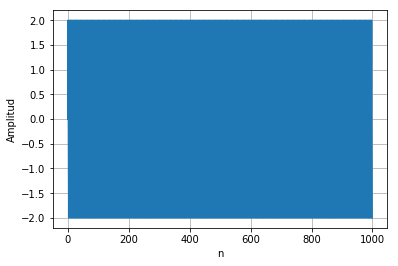

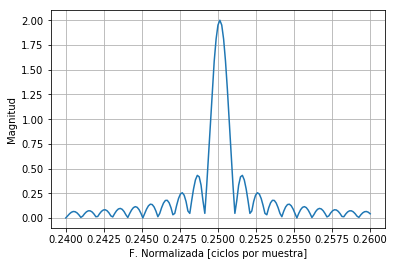

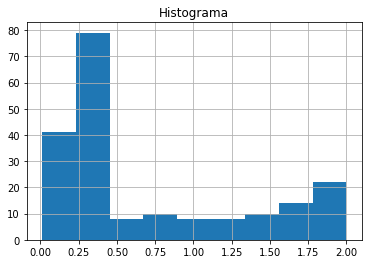

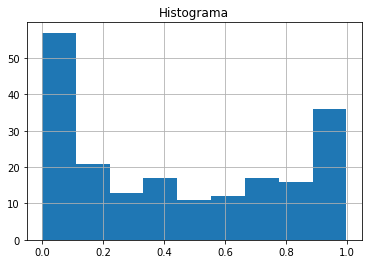

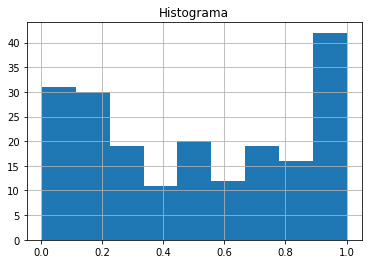

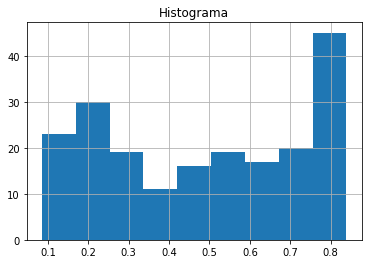

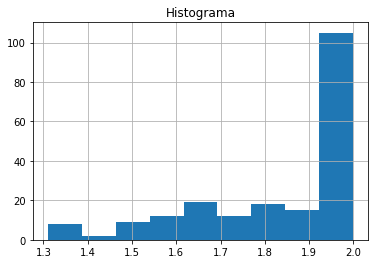

In [5]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

reps=200

def get_a(x,w,n0):
    
    res=np.zeros(reps)
    
    for i in range(0,reps):  
        xr=x[i]*w
        f,X=Espectro05(xr,"","",-20,10,0.24,0.26,True,False,False)  
        res[i]=X[n0]
    
    return res
    
k=np.linspace(0,N-1,N).flatten()


i=np.linspace (0,4,5, endpoint=True, retstep=False, dtype=int)
x0=2*np.sin((np.pi/2) * k)

x=[2*np.sin((np.pi/2 + ((2*((2*np.random.rand(1))-1)) * (2*np.pi)/N))*k)]*reps

for i in range(0,reps):
    x[i]=2*np.sin((np.pi/2 + ((2*((2*np.random.rand(1))-1)) * (2*np.pi)/N))*k)

f,X=Espectro05(x0,"","",-20,10,0.24,0.26,False,False,False)
W0=f[X.argmax()]
a0=X[X.argmax()]
n=X.argmax()

nn,w=pds.V_Rect(N)
ar=get_a(x,w,n)
inst.ShowHist(ar)

nn,w=pds.V_Bartlett(N)
ab=get_a(x,w,n)
inst.ShowHist(ab)

nn,w=pds.V_Hann(N)
ah=get_a(x,w,n)
inst.ShowHist(ah)

nn,w=pds.V_Blackman(N)
abm=get_a(x,w,n)
inst.ShowHist(abm)

nn,w=pds.V_Flattop(N)
aft=get_a(x,w,n)
inst.ShowHist(aft)

In [6]:

#######################################
# Tu simulación que genere resultados #
#######################################
sr=ar.mean()-a0
vr=ar.var()
sb=ab.mean()-a0
vb=ab.var()
sh=ah.mean()-a0
vh=ah.var()
sbm=abm.mean()-a0
vbm=abm.var()
sft=aft.mean()-a0
vft=aft.var()



tus_resultados = [ 
                   [sr, vr], # <-- acá debería haber numeritos :)
                   [sb, vb], # <-- acá debería haber numeritos :)
                   [sh, vh], # <-- acá debería haber numeritos :)
                   [sbm, vbm], # <-- acá debería haber numeritos :)
                   [sft, vft], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.283057,0.392709
Bartlett,-1.552778,0.123463
Hann,-1.495076,0.112685
Blackman,-1.510633,0.060816
Flat-top,-0.164758,0.036269


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

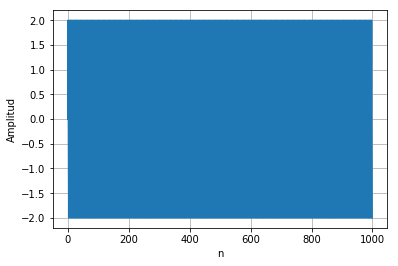

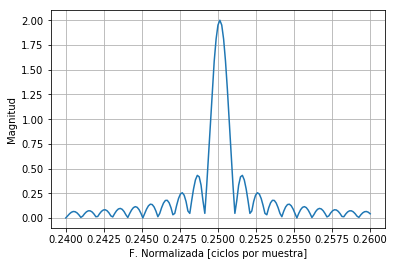

65 97


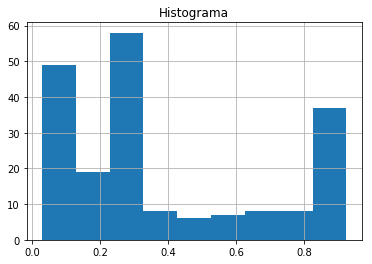

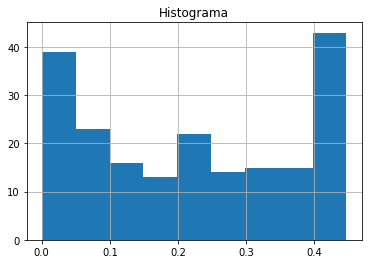

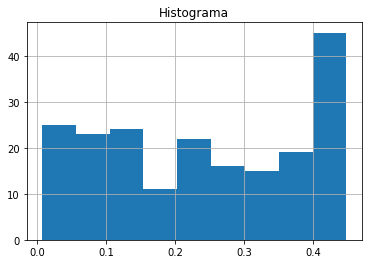

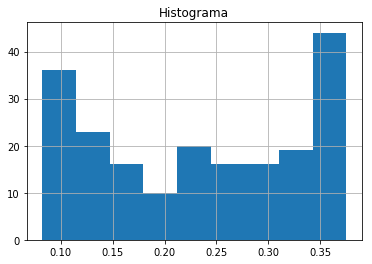

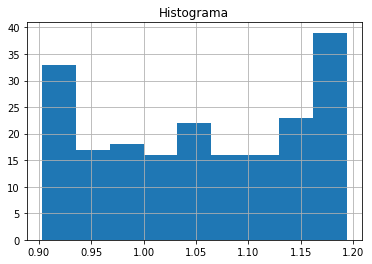

In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
reps=200

def get_a1(x,w,n0,n1):
    
    res=np.zeros(reps)
    
    for i in range(0,reps):  
        xr=x[i]*w
        f,X=Espectro05(xr,"","",-20,10,0.24,0.26,True,False,False)  
        res[i]=np.sqrt(((X[65]+X[97])**2)/5)
    
    return res
    
k=np.linspace(0,N-1,N).flatten()


i=np.linspace (0,4,5, endpoint=True, retstep=False, dtype=int)
x0=2*np.sin((np.pi/2) * k)

x=[2*np.sin((np.pi/2 + ((2*((2*np.random.rand(1))-1)) * (2*np.pi)/N))*k)]*reps

for i in range(0,reps):
    x[i]=2*np.sin((np.pi/2 + ((2*((2*np.random.rand(1))-1)) * (2*np.pi)/N))*k)

f,X=Espectro05(x0,"","",-20,10,0.24,0.26,False,False,False)
W0=f[X.argmax()]
a0=X[X.argmax()]

na=65
nb=97

print (na,nb)

nn,w=pds.V_Rect(N)
ar=get_a1(x,w,na,nb)
inst.ShowHist(ar)

nn,w=pds.V_Bartlett(N)
ab=get_a1(x,w,na,nb)
inst.ShowHist(ab)

nn,w=pds.V_Hann(N)
ah=get_a1(x,w,na,nb)
inst.ShowHist(ah)

nn,w=pds.V_Blackman(N)
abm=get_a1(x,w,na,nb)
inst.ShowHist(abm)

nn,w=pds.V_Flattop(N)
aft=get_a1(x,w,na,nb)
inst.ShowHist(aft)



In [8]:

#######################################
# Tu simulación que genere resultados #
#######################################
sr=ar.mean()-a0
vr=ar.var()
sb=ab.mean()-a0
vb=ab.var()
sh=ah.mean()-a0
vh=ah.var()
sbm=abm.mean()-a0
vbm=abm.var()
sft=aft.mean()-a0
vft=aft.var()

tus_resultados = [ 
                   [sr, vr], # <-- acá debería haber numeritos :)
                   [sb, vb], # <-- acá debería haber numeritos :)
                   [sh, vh], # <-- acá debería haber numeritos :)
                   [sbm, vbm], # <-- acá debería haber numeritos :)
                   [sft, vft], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.609128,0.091282
Bartlett,-1.777346,0.024284
Hann,-1.758499,0.021665
Blackman,-1.767411,0.010453
Flat-top,-0.944257,0.009096
